In [1]:
# import libraries
%matplotlib notebook
from math import *
import matplotlib.pylab as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import pandas as pd

from scipy.optimize import minimize

In [2]:
# data_file = 'panel_data.xlsx'
data_file = 'bottle_data.xlsx'
#data_file = 'brake_rotor_data.xlsx'
num_pareto_points = 100

In [3]:
df = pd.read_excel(data_file,header=(0,1,2,3),index_col=0)

data = df.to_numpy()

input_data = df.xs('input',axis=1,level='type')
output_data = df.xs('output',axis=1,level='type')


In [4]:
df

name,t,rib_depth,diameter,volume,displacement,mass
type,input,input,input,output,output,output
goal,Unnamed: 1_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,600000,min,min
pareto axis,Unnamed: 1_level_3,Unnamed: 2_level_3,Unnamed: 3_level_3,Unnamed: 4_level_3,x,y
1,0.250,3.0,70.0,536969.25754,3.06534,10.9000
2,0.250,3.0,77.5,663203.03503,3.53519,12.2803
3,0.250,3.0,85.0,802707.01771,4.12399,13.7027
4,0.250,5.5,70.0,517727.79649,2.07773,11.3433
5,0.250,5.5,77.5,641624.92726,2.35683,12.8037
6,0.250,5.5,85.0,778792.26320,2.64563,14.3061
7,0.250,8.0,70.0,494105.82832,1.34917,11.6800


In [5]:
# define input data features
X = input_data.to_numpy()

# define the target values
y = output_data.to_numpy()

In [6]:
# create model

polynomial_features = PolynomialFeatures(degree=2, include_bias=True)
linear_regression = LinearRegression(fit_intercept=False)

linear_regression.fit(polynomial_features.fit_transform(X),y)
linear_regression.coef_

model = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
model.fit(X, y)

model.named_steps["linear_regression"].coef_

#array([[  4.36649294e+01,  -1.81715792e+00,  -9.32703267e+00,
#          1.70893750e-02,   1.97234000e-01,   5.12958400e-01],
#       [ -3.72589931e+00,   3.41479167e-01,   1.28965158e+02,
#         -1.04166666e-05,   2.78692500e+00,  -1.96426667e-01]])

array([[-2.59548600e+04,  1.55593134e+04,  6.30306624e+03,
         2.05229094e+02,  9.79303700e+02, -7.58569302e+02,
        -8.24970211e+02, -3.87555865e+02, -1.48200484e+02,
         1.17368331e+02],
       [ 6.38320815e-02,  3.95482963e-02,  1.31600444e-02,
         4.44293704e-02,  2.78992593e-02,  2.22160000e-02,
        -3.57807407e-03,  2.83264000e-02, -9.62688889e-03,
         3.39911111e-04],
       [ 9.41211795e+00, -1.34666425e+01, -5.83303778e-01,
        -2.02123654e-01, -9.77224691e-01,  7.22168889e-01,
         7.85371852e-01, -2.13395556e-02,  1.06697778e-02,
         9.34419753e-04]])

In [7]:
# determine pareto axes and axes goals

y_axis_df = output_data.xs('y',axis=1,level='pareto axis')
x_axis_df = output_data.xs('x',axis=1,level='pareto axis')

y_axis_label = y_axis_df.columns.get_level_values(0).values[0]
y_axis_index = output_data.columns.get_level_values(0).get_loc(y_axis_label)
y_axis_goal = y_axis_df.columns.get_level_values(1)

x_axis_label = x_axis_df.columns.get_level_values(0).values[0]
x_axis_index = output_data.columns.get_level_values(0).get_loc(x_axis_label)
x_axis_goal = x_axis_df.columns.get_level_values(1)


In [8]:
# setup the inequality constraints for each input (use input data ranges)
# also, add any equality constraints that have been specified for the input values

constraints = []

for index,column in enumerate(input_data):
    if type(column[1]) is float or type(column[1]) is int:
        # equality constraint
        constraints.append({'type': 'eq',
                            'fun' : lambda x,target=column[1]: x[index]-target})
    
    else:
        # inequality constraint
    
        lower_lim = min(input_data[column])
        upper_lim = max(input_data[column])

        constraints.append({'type': 'ineq',
                            'fun' : lambda x,lower_lim=lower_lim,index=index: x[index]-lower_lim})
        constraints.append({'type': 'ineq',
                            'fun' : lambda x,upper_lim=upper_lim,index=index: upper_lim-x[index]})
    

In [9]:
# add equality constraints for any that are specified for the outputs
for index,column in enumerate(output_data):
    if type(column[1]) is float or type(column[1]) is int:
        print(index)
        # equality constraint
        constraints.append({'type': 'eq',
                            'fun' : lambda x,target=column[1],index=index: model.predict(x.reshape(1,-1))[0,index]-target})


0


In [10]:
def objective_func(x,index,sign=1.0): 
    return sign*model.predict(x.reshape(1,-1))[0,index]

x_starting_point = input_data.median().to_numpy()

# first, get the x pareto value lower and upper limits
#x_max_starting_point = X[y[:,x_axis_index].argmax(),:]
res = minimize(objective_func, x_starting_point, args=(x_axis_index,-1.0), 
               constraints=constraints, method='SLSQP', options={'disp': False})
x_max = -res.fun

#x_min_starting_point = X[y[:,x_axis_index].argmin(),:]
res = minimize(objective_func, x_starting_point, args=(x_axis_index,1.0),
               constraints=constraints, method='SLSQP', options={'disp': False})
x_min = res.fun
#pareto_starting_x = res.x

pareto_points = np.linspace(x_min,x_max,num=num_pareto_points)



In [11]:
pareto_input_values = []

x_axis_sign = 1 if x_axis_goal == 'min' else -1
y_axis_sign = 1 if y_axis_goal == 'min' else -1

for x_value in pareto_points:
    current_constraint = {'type': 'ineq',
           'fun' : lambda x, sign=x_axis_sign, limit=x_value, index=x_axis_index : 
                          sign*(limit-model.predict(x.reshape(1,-1))[0,index])}
    
    res = minimize(objective_func, x_starting_point, args=(y_axis_index,y_axis_sign),
                   constraints=constraints+[current_constraint,], method='SLSQP', options={'disp': False})

    #pareto_starting_x = res.x
    
    pareto_input_values.append(res.x)
        
    
    

In [12]:
pareto_output_values = model.predict(pareto_input_values)

<IPython.core.display.Javascript object>


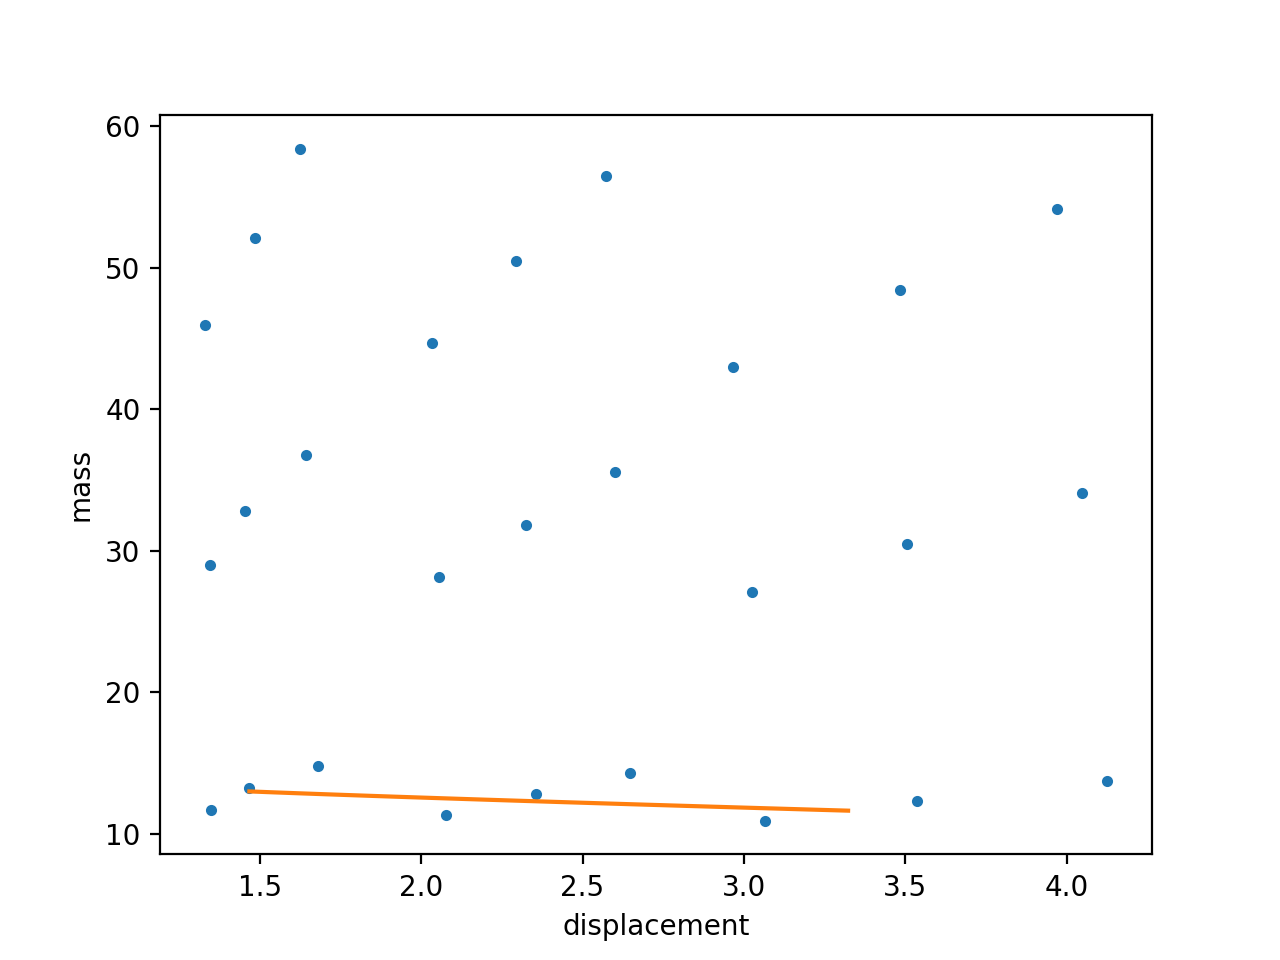

Text(0, 0.5, 'mass')

In [13]:
fig = plt.figure()

# plot original DOE values as points
plt.plot(y[:,x_axis_index],y[:,y_axis_index],'.')
plt.plot(pareto_output_values[:,x_axis_index],pareto_output_values[:,y_axis_index])
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)